In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline

# Import data #

In [2]:
df = pd.read_csv("Auto.csv")
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

# Train model with year as a numerical variables #

In [3]:
y, X = dmatrices('mpg ~ year', data=df, return_type='dataframe')
model = sm.OLS(y,X)
result = model.fit()

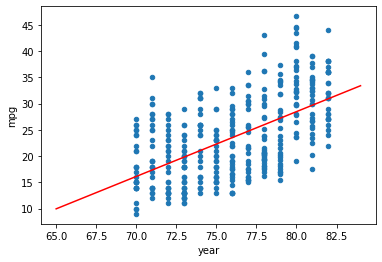

In [4]:
ax = df.plot(x='year', y='mpg', kind='scatter')

p = result.params
x = np.arange(65,85,1)
ax = ax.plot(x, p.Intercept + p.year * x, 'r')

# 2. Treating year as a categorical variable #

In [5]:
df['mpg'] = (df['mpg'] - df['mpg'].min())/(df['mpg'].max() - df['mpg'].min())

In [6]:
y, X = dmatrices('mpg ~ C(year)', data=df, return_type='dataframe')
model2 = sm.Logit(y,X)
resultCat = model2.fit()
resultCat.summary2()

Optimization terminated successfully.
         Current function value: 0.577718
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: -0.019  
Dependent Variable: mpg              AIC:              484.7079
Date:               2020-01-21 17:40 BIC:              536.4991
No. Observations:   397              Log-Likelihood:   -229.35 
Df Model:           12               LL-Null:          -225.13 
Df Residuals:       384              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -1.2021   0.4405 -2.7288 0.0064 -2.0655 -0.3387
C(year)[T.71]    0.4748   0.5972  0.7951 0.4266 -0.6957  1.6453
C(year)[T.72]    0.1475   0.6168  0.2392 0.8109 -1.0614  1.3565
C(year)[T.73]   -0.0905   0.5848 -0.1547 0.8771 -1.2366  1.0557
C(year)[T.74]    0.6460   0.5949  1.0858 0.2775 -0.5200  1.8121
C(year)[T.75]    0.3531   0.5940  0.5944 0.5523 -0.8112  1.5174
C(year)[T.76]    0.5137   0.5711  0.8995 0.3684 -0.6057  1.6331
C(year)[T.77]    0.7223   0.5876  1.2293 0.2190 -0.4294  1.8740
C(year)[T.78]    0.7989   0.5565  1.4355 0.1511 -0.2919  1.8897
C(year)[T.79]    0.9121   0.5787  1.5761 0.1150 -0.2222  2.0463
C(year)[T.80]    1.8512   0.5891  3.1425 0.0017  0.6966  3.0058
C(year)[T.81]    1.4733   0.5784  2.5473 0.0109  0.3397  2.6070
C(year)[T.82]    1.6565   0.5783  2.8647 0.0042  0.5232  2.7899
===============================================================

"""

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.77e-37
Time:                        23:45:22   Log-Likelihood:                -1297.7
No. Observations:                 397   AIC:                             2599.
Df Residuals:                     395   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.2001      6.605    -10.628      0.000     -83.186     -57.214
year           1.2332      0.087     14.205      0.000       1.063       1.404
==============================================================================
Omnibus:                       22.297   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.960
Skew:                           0.379   Prob(JB):                     0.000342
Kurtosis:                       2.376   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""